### Simulación tipo [Monte Carlo](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo): El juego de "[cara o cruz](https://es.wikipedia.org/wiki/Cara_o_cruz)"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
from sklearn.metrics import accuracy_score

### El juego

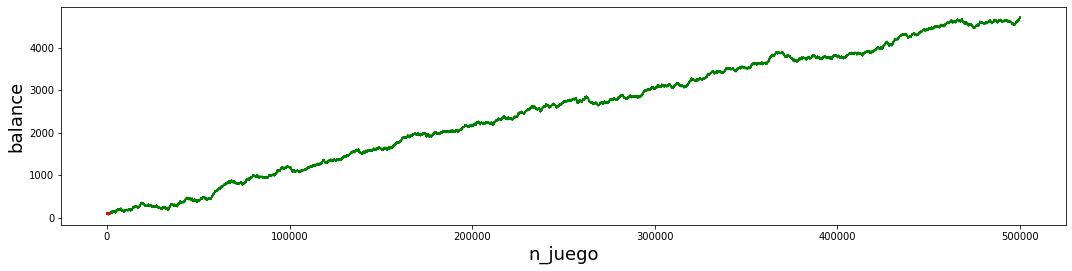

Mi balance final: 4716
accuracy_score:   0.504616


In [2]:
# empiezo con 100 monedas
mi_dinero = 100

# guardar mi balance aqui
mi_balance = []

# el numero de juegos
n_juegos =  500_000

y_true = []
y_pred = []

for i in range(n_juegos):
    
    arrojada   = (random.uniform(0, 1) >= 0.5 )*1
    y_true.append(arrojada)

    mi_elecion = (random.uniform(0, 1) >= 0.5 )*1
    ventaja    = random.uniform(0, 1)

# We are going to change the value from 0.0 to 0.0001
# We are going to change from 0.0001 to 0.001
# We are going to change from 0.001 to 0.01 and increase to 500k
    if ventaja < 0.01: # gano yo una moneda ¡fijo!
        mi_dinero = mi_dinero +1
        mi_balance.append(mi_dinero)
        y_pred.append(arrojada)
        
    elif mi_elecion == arrojada: # si acierto, gano una moneda
        mi_dinero = mi_dinero +1
        mi_balance.append(mi_dinero)
        y_pred.append(arrojada)
        
    else:                       # si no acierto, pierdo una moneda
        mi_dinero = mi_dinero -1
        mi_balance.append(mi_dinero)
        if arrojada == 1:
            y_pred.append(0)
        else:
            y_pred.append(1)
            

# Plot
mi_balance_array = np.array(mi_balance)
en_credito = np.ma.masked_where(mi_balance_array < 100, mi_balance_array)
en_deuda   = np.ma.masked_where(mi_balance_array > 99, mi_balance_array)

fig, ax = plt.subplots(figsize=(18, 4))
plt.plot(en_credito, color="green")
plt.plot(en_deuda,   color="red")
ax.set_ylabel ("balance", fontsize=18);
ax.set_xlabel ("n_juego", fontsize=18)
plt.show();

# Print
print("Mi balance final:", mi_balance[-1])
print("accuracy_score:  ", accuracy_score(y_true, y_pred))